# Un primer vistazo a una Red Neuronal

Utilizaremos la **biblioteca Python Keras** para aprender a **clasificar** dígitos manuscritos.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de números escritos a mano (28 x 28 píxeles) en sus 10 categorías (de 0 a 9)
- Usaremos 60K imágenes de entrenamiento, más de 10K imágenes de prueba todas ellas recopiladas por el National Institute of Standards an Technology (NIST de MNIST) en los años ochenta.
- Este es el "Hola Mundo" del Deep Learning
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras

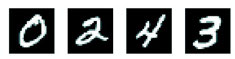

- Una "categoría" de un problema de clasificación, se denomina **clase**
- Los "puntos de datos" son **muestras**
- La clase asociado a una muestra específica se llama **etiqueta**
- Por ahora no vamos a ejecutarlo, vamos a intentar entenderlo

In [44]:
# 1._ IMPORTAMOS KERAS
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)


3.10.0
GPU Available: []
2.20.0


Cargamos el conjunto de datos  MNIST en Keras

In [45]:
from tensorflow import keras

# Change to Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1)

Echamos un vistazo a los **datos de entrenamiento**:

In [46]:
import tensorflow as tf
print(train_images.shape)

(60000, 28, 28)


In [47]:
# Vemos la matriz de la imagen número 30.000 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

In [48]:
# Load the Fashion MNIST dataset
from tensorflow import keras

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

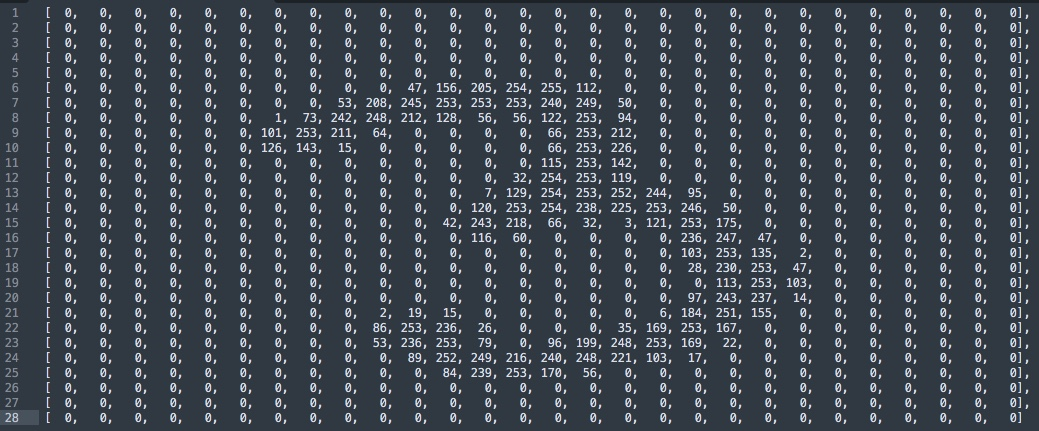

In [49]:
# La imagen anterior corresponde con el número 3. Hasta se puede intuir....
train_labels[30000]

np.uint8(3)

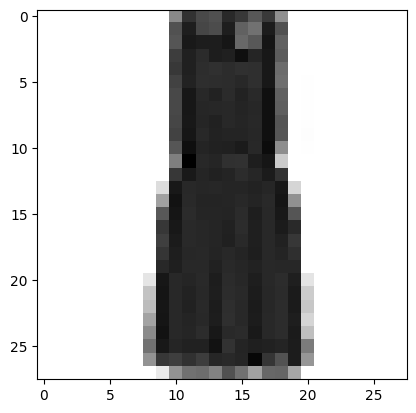

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Veamos el elemento 30000 y pintémoslo con matplotlib
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [51]:
import tensorflow as tf
# Ensure fashion_mnist is loaded
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

len(train_labels)

60000

In [52]:
import tensorflow as tf
# Ensure fashion_mnist is loaded
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

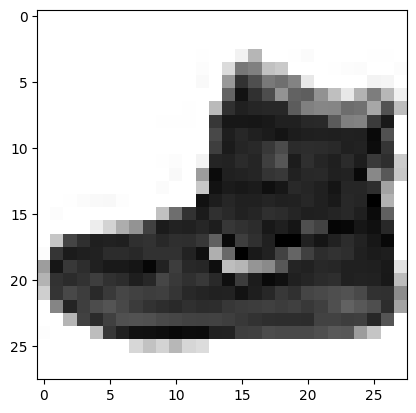

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Veamos el elemento 0 (que vemos que es un 5) y pintémoslo con matplotlib
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Los **datos de prueba**:

In [54]:
import tensorflow as tf
# Ensure fashion_mnist is loaded
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

test_images.shape

(10000, 28, 28)

In [55]:
len(test_labels)

10000

In [56]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

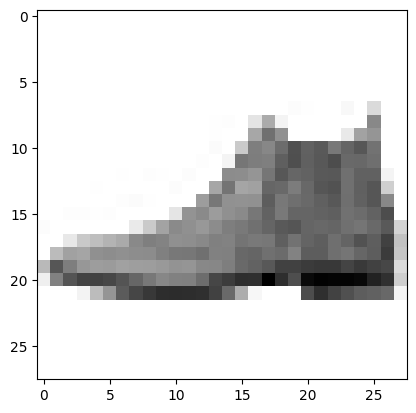

In [57]:
# Veamos el elemento 0 de test (que vemos que es un t) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Fujo de trabajo
1. Damos a la RNA los datos de entrenamiento `train_images` y `train_labels`
2. La red aprenderá a asociar imágenes y etiquetas
3. Pediremos a la RNA que haga predicciones para `test_images` y comprobaremos si estas predicciones coinciden con las etiquetas de `test_labels`

**CONSTRUIMOS LA RNA**

- **Capa** (**layers**) es el **componente básico de las redes neuronales**. => Es un **filtro** de datos (módulo de procesamiento de datos).Entran datos y salen con una forma más útil para el objetivo del problema a resolver. => **Destilación de datos**
    - Las capas extraen **representaciones**  de los datos introducidos en ellas, que deberían ser más significativas para el problema en cuestión.

In [58]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers

# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
network = models.Sequential()
# Creamos dos capas "Dense", que son capas neuronales densamente conectadas
# (también llamadas "completamente conectadas"). Cada una de las 512 neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo
# deduce.
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Probar 10 neuronas y 'sigmoid' <==============================================
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual
# pertenezca a una de nuestras clases de 10 dígitos.
network.add(layers.Dense(10, activation='softmax'))
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases
network.summary()
# Nombre de las capas automáticos a no ser que lo definamos
# 401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.050 = 401.920 + 5.130

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

A menudo se indica la **inicialización de los pesos** como argumento de las capas `Dense`. <=====BUSCAR=====> Los valores iniciales deben ser adecuados para que el problema de optimización converja tan rápido como sea posible en el proceso de entrenamiento de la red. En el manual de Keras podéis ver diversas opciones de inicialización.

* Probar en la primera capa: 10 neuronas y función de activación **'sigmoid'**

* https://keras.io/models/sequential
* Para modelos más complejos: https://keras.io/getting-started/functional-api-guide
* https://keras.io/layers/core/#dense

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


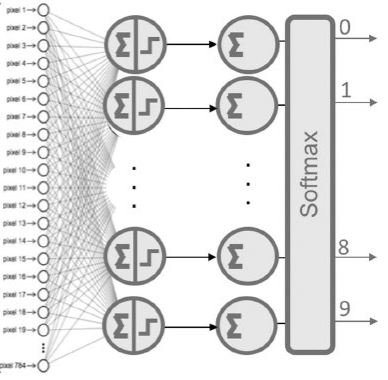

**SOFTMAX**

* La función **softmax** en la que la salida de cada neurona corresponde a la probabilidad estimada de la clase correspondiente. Dada una imagen de entrada, obtendremos las probabilidades de que sea cada uno de los 10 posibles dígitos. Esta aproximación de usar una distribución de probabilidades nos puede dar una mejor idea de cuán confiados estamos de nuestra predicción.

* Para cada ejemplo de entrada obtendremos como vector de salida de la red neuronal una distribución de probabilidad sobre un conjunto de etiquetas mutuamente excluyentes, es decir, un vector de 10 probabilidades cada una correspondiente a un dígito y que todas estas 10 probabilidades sumen 1 (las probabilidades se expresarán entre 0 y 1).

* La función softmax se basa en calcular **“las evidencias”** de que una determinada imagen pertenece a una clase en particular y luego se convierten estas evidencias en probabilidades de que pertenezca a cada una de las posibles clases

* Para medir la **evidencia** de que una determinada imagen pertenece a una clase en particular, una aproximación consiste en realizar una **suma ponderada de la evidencia de pertenencia** de **cada uno de sus píxeles** a esa clase.

* Ejemplo con el 0: 28×28 píxeles, los píxeles en rojo  representa pesos negativos (es decir, reducir la evidencia de que pertenece), mientras que los píxeles en azul representan pesos positivos (aumenta la evidencia de que pertenece). El color negro representa el valor neutro

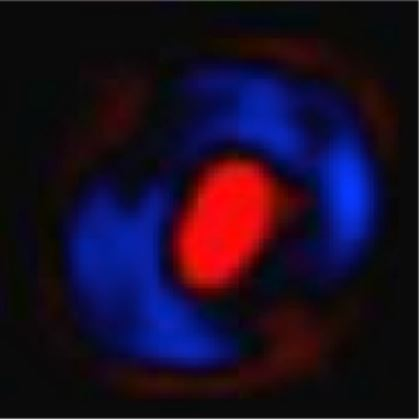

* Hoja en blanco encima sobre la que trazamos un cero. En general, el trazo de nuestro cero caería sobre la zona azul. Resulta bastante evidente que si nuestro trazo pasa por encima de la zona roja lo más probable es que no estemos escribiendo un cero; por tanto, usar una **métrica basada en sumar si pasamos por zona azul y restar si pasamos por zona roja, parece razonable**.

* Para confirmar que es una buena métrica imaginemos ahora que trazamos un tres; está claro que **la zona roja del centro** del anterior modelo que usábamos para el cero **va a penalizar la métrica **antes mencionada puesto que como podemos ver en la parte izquierda de esta figura al escribir un tres pasamos por encima.

* Pero en cambio, si el modelo de referencia es el correspondiente al 3 como el mostrado en la parte derecha de la figura, podemos observar que, en general, los diferentes posibles trazos que representan un tres se mantienen mayormente en la zona azul.

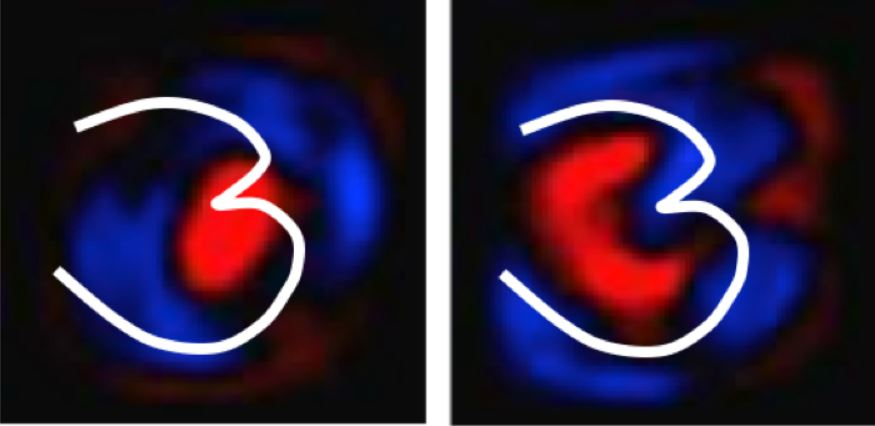

Tras el aprendizaje:

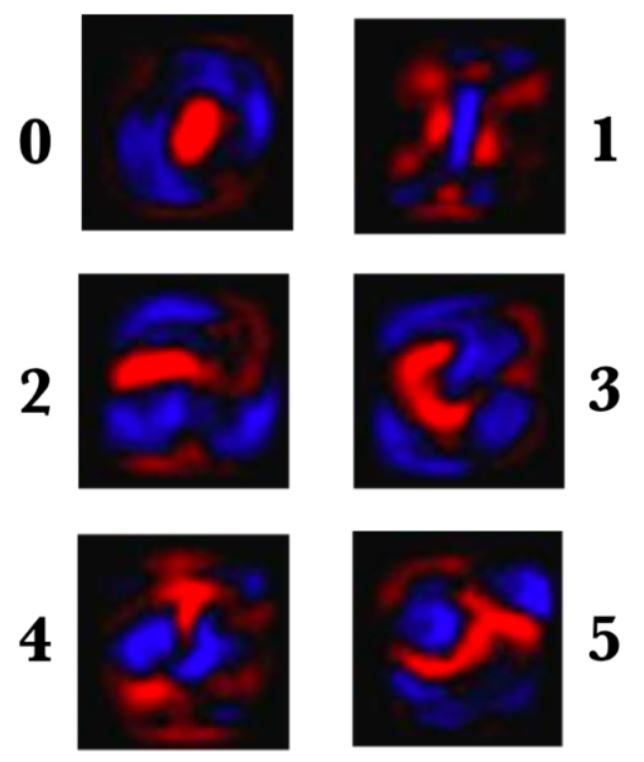

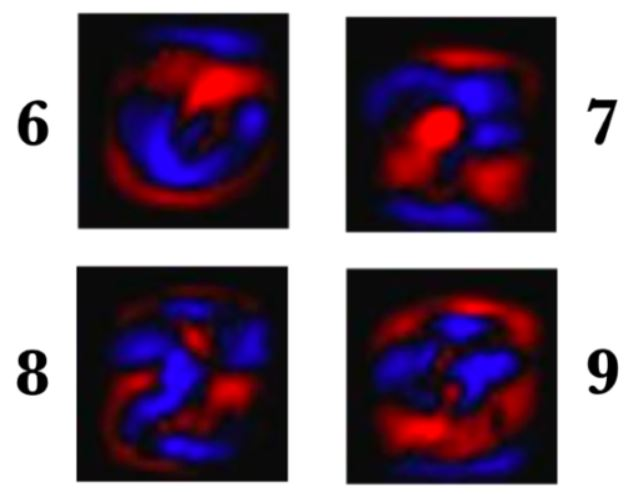

* **Softmax** usa el valor exponencial de las evidencias calculadas y luego las normaliza de modo que sumen uno, formando una distribución de probabilidad. La probabilidad de pertenencia a la clase i es:

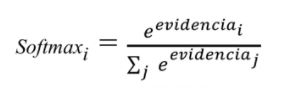

Para que nuestra red esté lista para la capacitación, debemos elegir tres cosas más, como parte del paso de "compilación":
- Una **función de pérdida**: es cómo la red podrá medir qué tan bien está haciendo el trabajo con los datos de entrenamiento y, por lo tanto, cómo será capaz de dirigirse en la dirección correcta. (Lo veremos en detalle más adelante)
- Un **optimizador**: este es el mecanismo a través del cual la red se actualizará en función de los datos que ve y su función de pérdida. (Lo veremos en detalle más adelante)
- **Métricas** para monitorizar durante el entrenamiento y las pruebas. Solo nos preocuparemos por la **precisión** `accuracy` (la fracción de las imágenes que fueron clasificado).

In [60]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
# Algoritmo optimizador rmsprop (Root Mean Square Propagation): Es un algoritmo
# similar a AdaGrad (Adaptive Gradient Algorithm) que mantiene un factor de
# entrenamiento diferente para cada dimensión, pero en este caso el escalado
# del factor de entrenamiento se realiza dividiéndolo por la media del declive
# exponencial del cuadrado de los gradientes.
network.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# 'categorical_crossentropy' es la función de pérdida que se utiliza como señal
# de retroalimentación para aprender los tensores de peso y que la fase de
# entrenamiento intentará minimizar
# La reducción de la pérdida se produce mediante el descenso de gradiente
# estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
# 'rmsprop'
# 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
# correctamente clasificadas

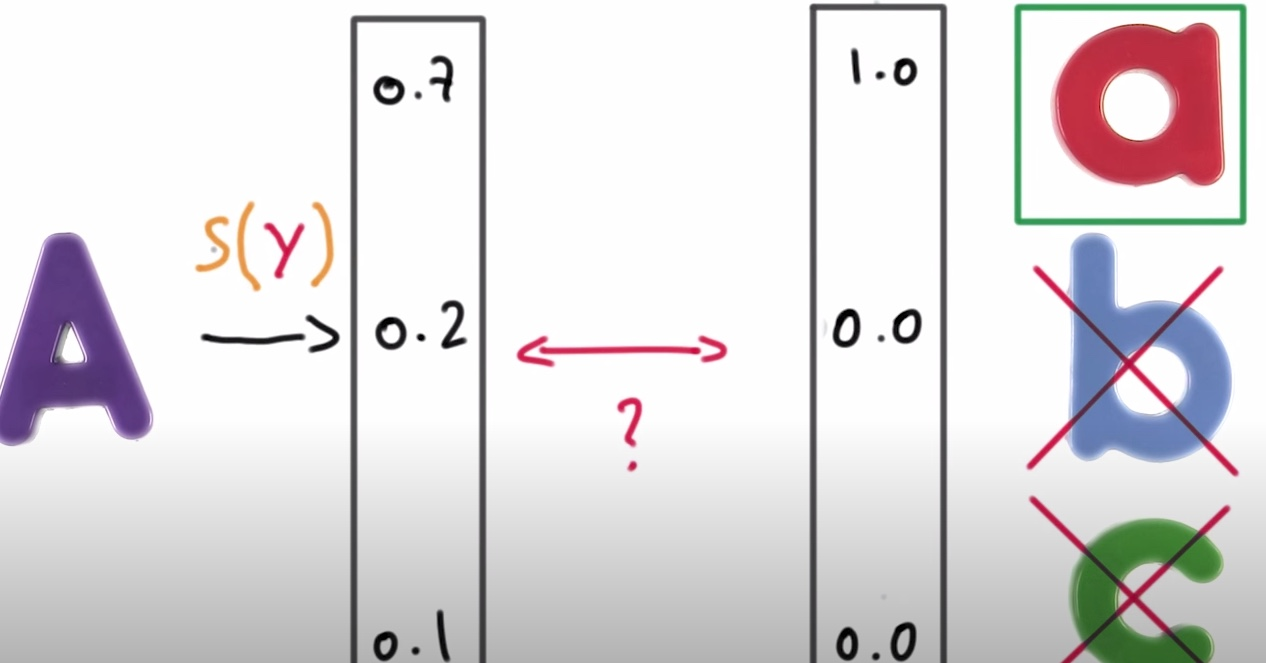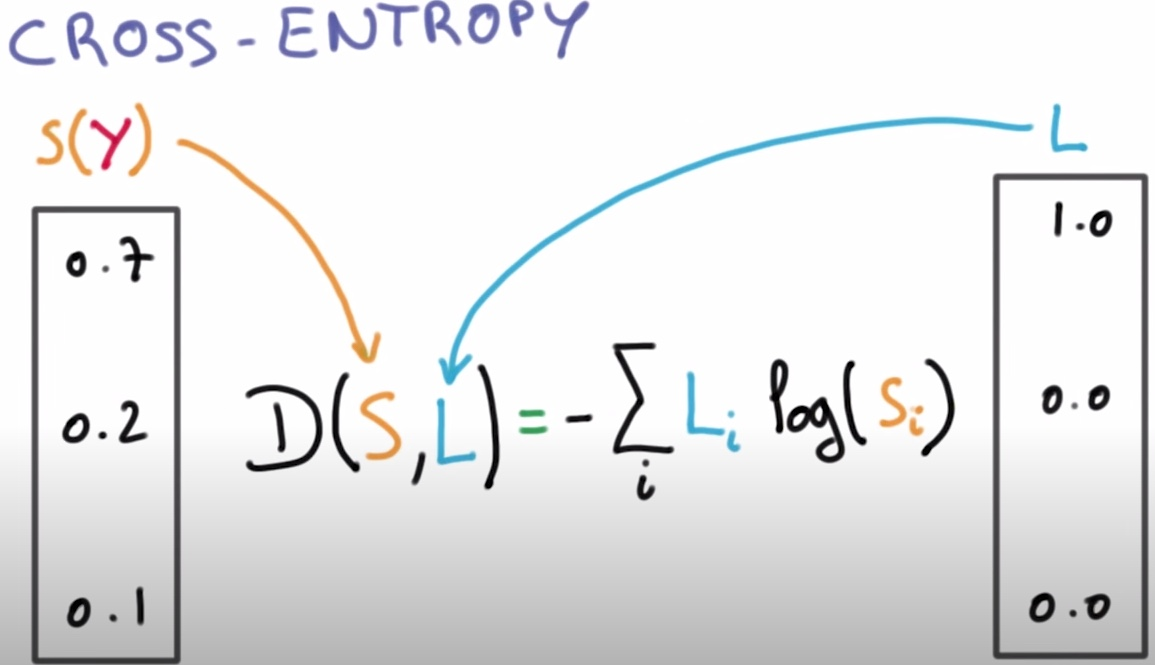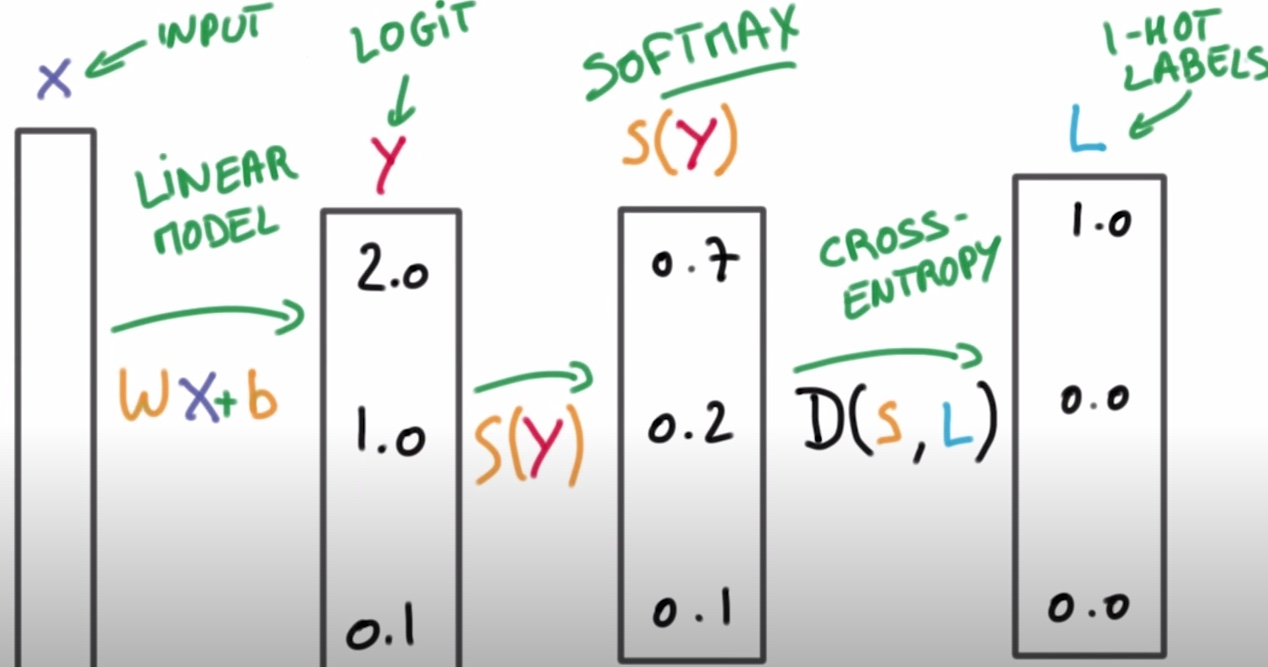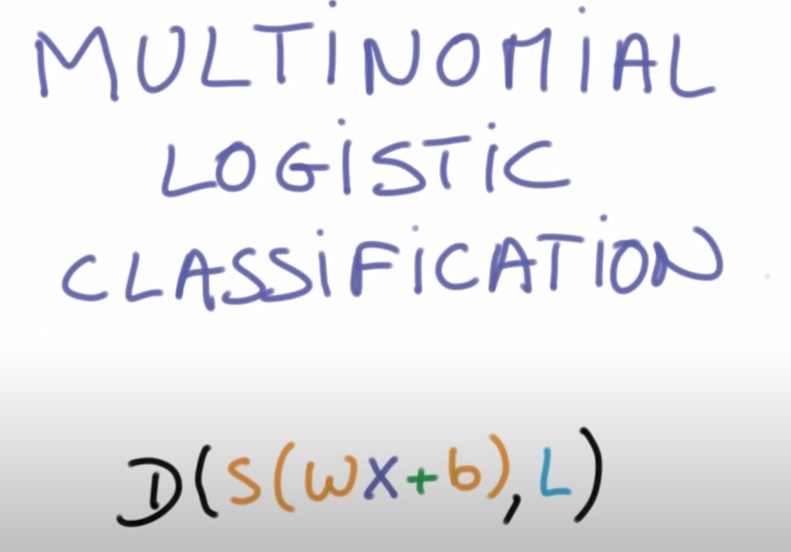

Antes del entrenamiento, **preprocesaremos nuestros datos** dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo `[0, 1]`. Antes, nuestras imágenes de entrenamiento, por ejemplo, se almacenaban en una matriz de forma `(60000, 28, 28)` de tipo `uint8` con valores en el intervalo `[0, 255]`. Lo transformamos en una matriz de forma `float32` con forma `(60000, 28 * 28)` con valores entre 0 y 1.

**NORMALIZACION**

La normalización que vamos a hacer se hacen **para facilitar que converja el proceso de entrenamiento** de la red. En general, para alimentar a redes neuronales, **no se usan datos con valores que sean mucho más grandes que los valores de los pesos de la red, o datos que sean heterogéneos de rango entre ellos**

In [61]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [62]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [64]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

También tenemos que **codificar categoricamente las etiquetas**. Usaremos el **one-hot encoding**, que en resumen, consiste en transformar las etiquetas en un vector de tantos ceros como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta:

In [65]:
# 6.- PREPARACIÓN LAS ETIQUETAS
from tensorflow.keras.utils import to_categorical

# Use tf.keras.utils.to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# The number 30000 training image's label (if it was a 3 in MNIST) would now represent a different class in Fashion MNIST.
# This line is just for demonstration, keeping it to show the one-hot encoding.
print(train_labels[30000])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Ya estamos listos para **entrenar a la red**, lo cual se hace en Keras a través de una llamada al métido `fit` de la red, que **ajusta el modelo a sus datos de entrenamiento**:

In [66]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
# * epochs: Épocas: un límite arbitrario, definido como
# "una pasada sobre todo el conjunto de datos", que se utiliza para
# separar el entrenamiento en distintas fases, que es útil para el
# registro y la evaluación periódica.
# * batch_size: Entero o NULO. Número de muestras por actualización de gradiente.
# If not specified, batch_size defaults to 32.

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

# Redefine and compile the model within this cell
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize images
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Fit the network
network.fit(x_train, y_train, epochs=15, batch_size=128)
# La red empezará a iterar por lo datos de entrenamiento en minilotes de 128
# muestras, 5 veces (cada iteración por los datos de entrenamiento recibe el
# nombre de "repetición"). En cada iteración, la red computará los gradientes de
# los pesos en relación con la pérdida en el lote y ajustará los pesos en
# consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes
# de gradiente (469 por repetición), la pérdida será lo bastante baja como para
# que la red sea capaz de clasificar números escritos a mano con gran exactitud.

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7442 - loss: 0.7303
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8546 - loss: 0.4007
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8707 - loss: 0.3500
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8842 - loss: 0.3164
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8913 - loss: 0.2972
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8984 - loss: 0.2739
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9022 - loss: 0.2651
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9059 - loss: 0.2561
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9124 - loss: 0.2345
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9148 - loss: 0.2291
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9149 - loss: 0.2262
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

* `fit()` devuelve un objeto `History` cuyo atributo `History.history()` contiene los valores de `loss` para los datos de entrenamiento y resto de métricas en sucesivas `epochs`. Esta información es fundamental para evitar **overfitting**

* Se muestran dos cantidades durante el entrenamiento: la **pérdida** (`loss`) de la red sobre los datos de entrenamiento y la **precisión** o exactitud (`acc`) de la red sobre los datos de entrenamiento.

* Alcanzamos rápidamente una precisión de 0,989 (es decir, 98,9%) en los datos de entrenamiento. Ahora verificamos que nuestro modelo también funcione bien en el conjunto de prueba:

In [67]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
from tensorflow.keras.utils import to_categorical

# Reload the Fashion MNIST dataset to get original labels for plotting
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_orig, y_train_orig), (test_images_orig, test_labels_orig) = fashion_mnist.load_data()

# Reshape and normalize test images (already done in the previous cell, but re-doing for clarity here if cell is run independently)
test_images = test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Convert test_labels to one-hot encoding (already done in the previous cell)
test_labels = to_categorical(test_labels_orig)

test_loss, test_acc = network.evaluate(test_images, test_labels)
# HEMOS UTILIZADO MENOS DE 20 LÍNEAS DE CÓDIGO...

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3691


In [68]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.357822060585022
test_acc: 0.876800000667572


La **precisión** de nuestro **conjunto de prueba** resulta ser del 98%, lo que es **un poco más baja** que la **precisión** del conjunto de **entrenamiento**. Esta diferencia es un ejemplo de **sobreajuste**, el hecho de que **los modelos de aprendizaje automático tienden a funcionar peor con datos nuevos que con sus datos de entrenamiento**. El sobreajuste será algo que veamos en detalle más adelante.

* Para **evaluar** este  modelo solo **nos hemos centrado en su `accuracy`**, es decir la **proporción entre las predicciones correctas** que ha hecho el modelo y el **total de predicciones**.
* También hay que **tener en cuenta los tipos de predicciones correctas e incorrectas** que realiza el modelo **en cada una de sus categorías** => **Matriz de Confusión**
* Usamos esta **tabla** para **entender mejor cómo el modelo se comporta de bien**  y es muy útil para **mostrar de forma explícita cuando una clase es confundida con otra**. Una matriz de confusión para un clasificador binario sería:

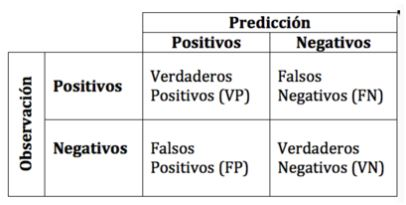

Accuracy o **PRECISIÓN = (VP + VN) / (VP + FP + VN + FN)**

* Imaginar un modelo que predice si una seta es venenosa....No admito FN

**RECALL = VP / (VP + FN)**

Veamos la matriz de confusión de nuestro ejemplo:

In [69]:
# Look at confusion matrix
# Note, this code is taken straight from the SKLEARN website, an nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[710   1   8  14   4   1 257   0   5   0]
 [  1 968   1  21   3   0   6   0   0   0]
 [  9   0 702  11 113   0 165   0   0   0]
 [ 10   3   6 906  15   0  56   0   4   0]
 [  1   0  54  48 776   0 120   0   1   0]
 [  0   0   0   1   0 966   0  17   0  16]
 [ 50   0  32  17  43   0 852   0   6   0]
 [  0   0   0   0   0  10   0 942   0  48]
 [  5   0   0   4   3   1  13   3 971   0]
 [  0   0   0   1   0   4   1  19   0 975]]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


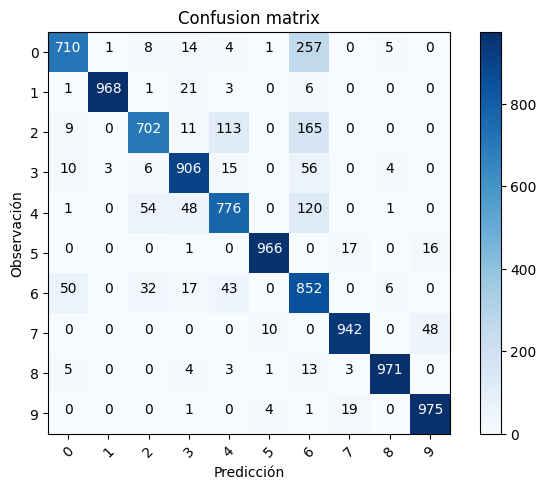

In [70]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1)
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

* https://en.wikipedia.org/wiki/Confusion_matrix
* https://scikit-learn.org/stable

**GENERACIÓN DE PREDICCIONES**

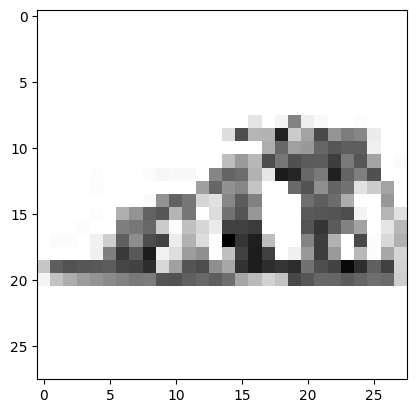

In [71]:
# Veamos el elemento 12 de test y pintémoslo con matplotlib
from keras.datasets import mnist
import tensorflow as tf

# Load Fashion MNIST data for plotting original images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images_plot, train_labels_plot), (test_images_plot, test_labels_plot) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
digit = test_images_plot[11]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [72]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Load the Fashion MNIST dataset for processing
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = fashion_mnist.load_data()

# Reshape and normalize images
train_images = x_train_raw.reshape((60000, 28 * 28))
test_images = x_test_raw.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_raw)
y_test_one_hot = to_categorical(y_test_raw)

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES===============================")
print(y_test_raw[11]) # Original label for index 11
print("=======================================================================")
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical==========")
print(y_test_one_hot[11]) # One-hot encoded label for index 11
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6 EN MNIST, pero ahora es otro artículo de ropa)=====")
print(predictions[11])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DE CLASE DEL ELEMENTO 12========================")
print(np.argmax(predictions[11]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 12 DEBERÍA SER 1==")
print(np.sum(predictions[11]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES===============================
5
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical==========
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6 EN MNIST, pero ahora es otro artículo de ropa)=====
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DE CLASE DEL ELEMENTO 12========================
5
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 12 DEBERÍA SER 1==
1.0000001
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Distribución de Probalidades

In [73]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


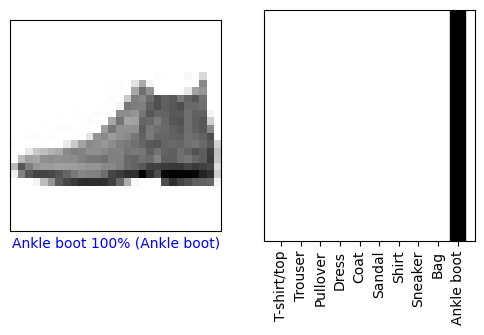

<Figure size 640x480 with 0 Axes>

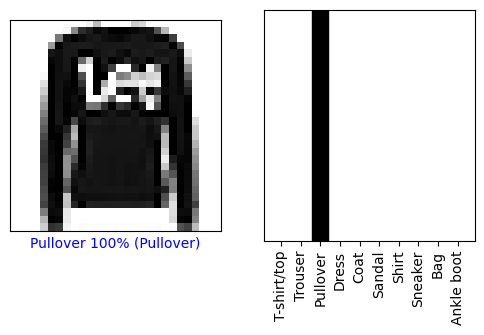

<Figure size 640x480 with 0 Axes>

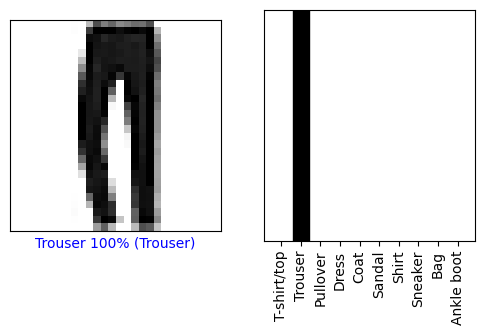

<Figure size 640x480 with 0 Axes>

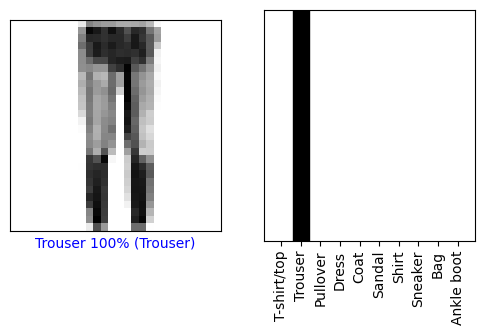

<Figure size 640x480 with 0 Axes>

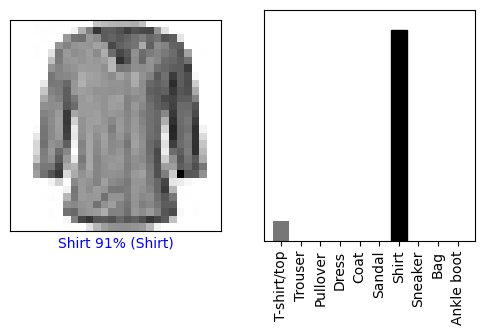

<Figure size 640x480 with 0 Axes>

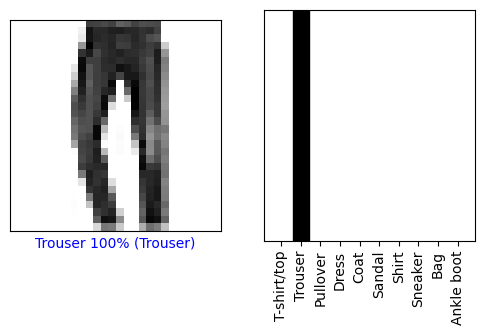

<Figure size 640x480 with 0 Axes>

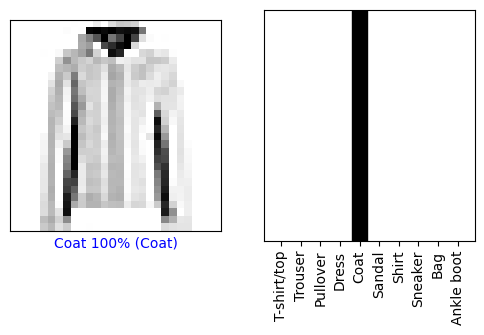

<Figure size 640x480 with 0 Axes>

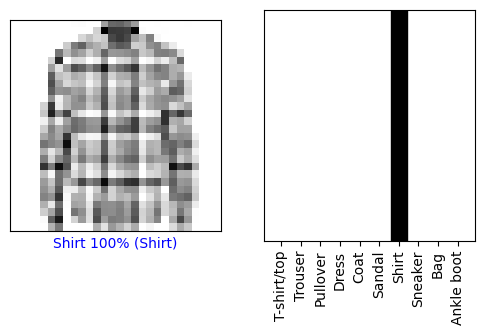

<Figure size 640x480 with 0 Axes>

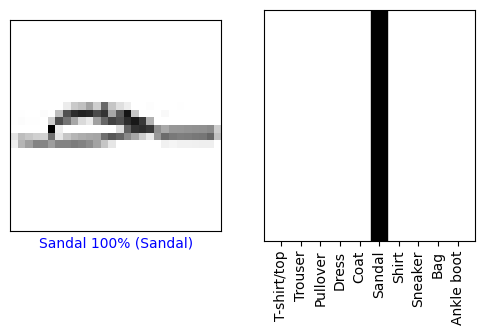

<Figure size 640x480 with 0 Axes>

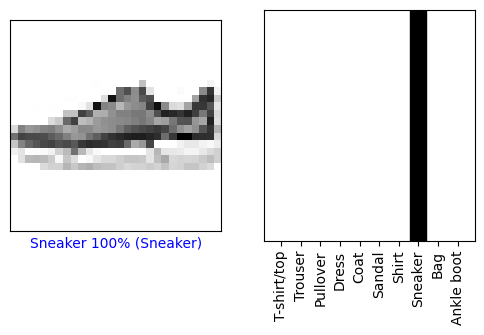

<Figure size 640x480 with 0 Axes>

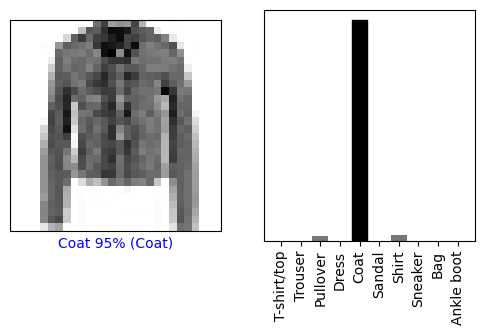

<Figure size 640x480 with 0 Axes>

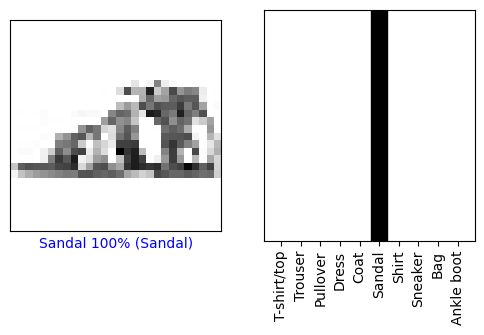

<Figure size 640x480 with 0 Axes>

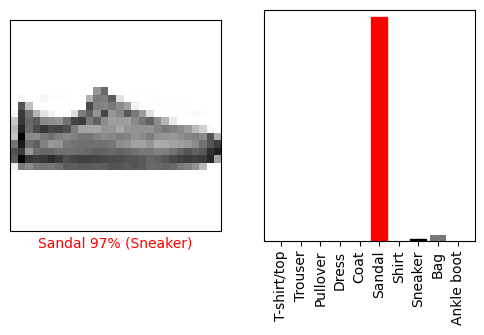

<Figure size 640x480 with 0 Axes>

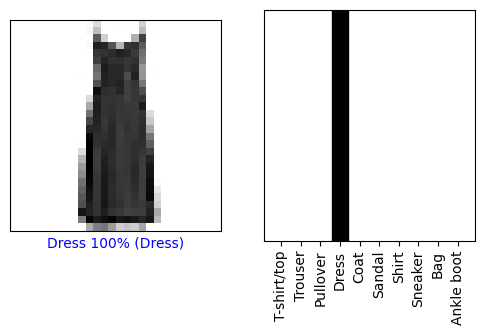

<Figure size 640x480 with 0 Axes>

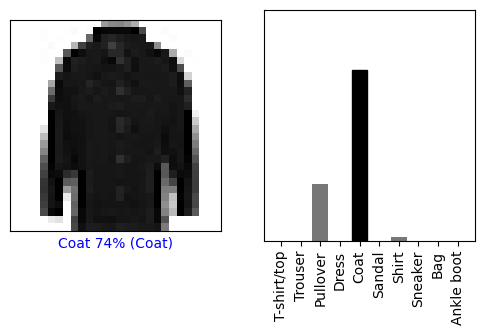

<Figure size 640x480 with 0 Axes>

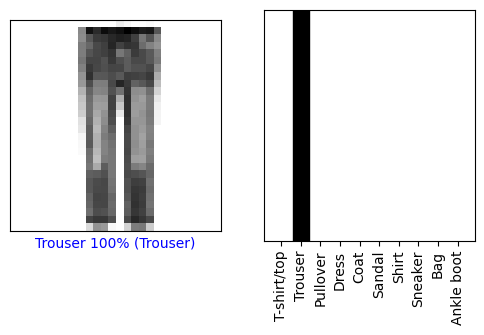

<Figure size 640x480 with 0 Axes>

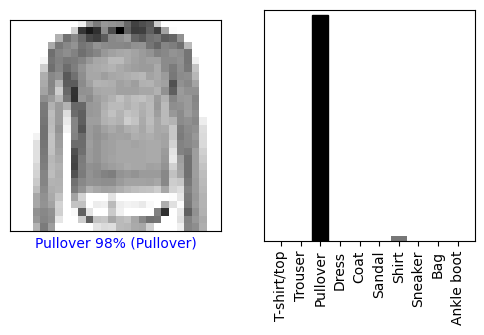

<Figure size 640x480 with 0 Axes>

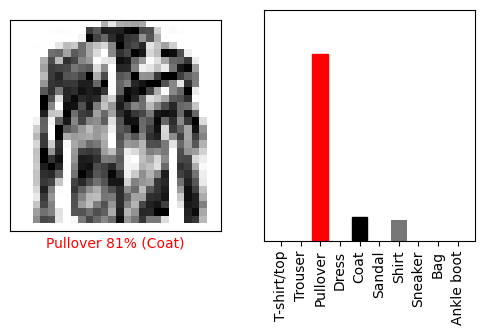

<Figure size 640x480 with 0 Axes>

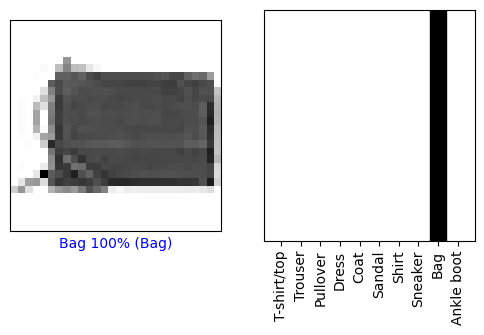

<Figure size 640x480 with 0 Axes>

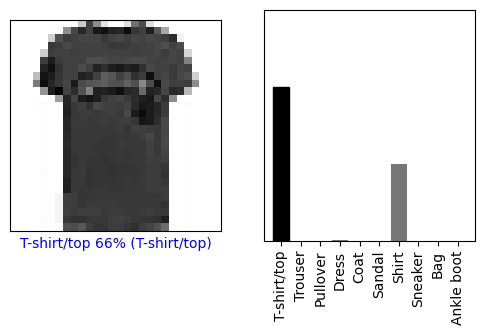

<Figure size 640x480 with 0 Axes>

In [74]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Define the class names for Fashion MNIST
fashion_mnist_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(fashion_mnist_class_names[predicted_label],
                                100*np.max(predictions_array),
                                fashion_mnist_class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), fashion_mnist_class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

# Load the Fashion MNIST dataset to get original labels and images for plotting
(x_train_orig, y_train_orig), (test_images_orig, test_labels_orig) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape and normalize test images for prediction (as done for training)
test_images_for_prediction = test_images_orig.reshape((10000, 28 * 28))
test_images_for_prediction = test_images_for_prediction.astype('float32') / 255

# Make predictions using the trained network
predictions = network.predict(test_images_for_prediction)

# Now, use the original test_images (28x28) and test_labels_orig for plotting
# The network object is from the previous cell, it holds the trained model.
for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  # Pass test_images_orig (28x28) and test_labels_orig (integer) to the plot functions
  plot_image(i, predictions[i], test_labels_orig, test_images_orig)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels_orig)
  plt.show()
  plt.clf()

## Un repaso a softmax

In [75]:
try:
  # %tensorflow_version solo existe en Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
3.10.0
GPU Available: []
2.20.0


In [76]:
mnist = tf.keras.datasets.fashion_mnist
# A partir de ahora, x es la matriz de la imagen e y es la etiqueta
(x_train, y_train), (x_test, y_test) = mnist.load_data()

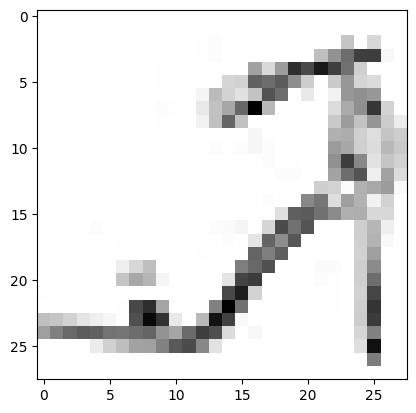

In [77]:
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [78]:
print(y_train[8])

5


In [79]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  13  62 154  62   0   0   0   

In [80]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax', name="FC1", input_shape=(784,))
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)

model.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FC1 (Dense)                     │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.7352 - loss: 0.7756
313/313 - 0s - 983us/step - accuracy: 0.8125 - loss: 0.5297


[0.5297365784645081, 0.8125]

[array([[-0.13, -0.01, -0.13, ..., -0.  , -0.03,  0.05],
       [-0.03, -0.07,  0.04, ...,  0.05, -0.05, -0.02],
       [ 0.09, -0.15, -0.08, ..., -0.02, -0.04, -0.02],
       ...,
       [-0.07, -0.07,  0.08, ..., -0.06, -0.16, -0.02],
       [-0.15,  0.02,  0.01, ..., -0.01, -0.13,  0.04],
       [-0.08,  0.03,  0.08, ..., -0.  , -0.11,  0.05]], dtype=float32), array([ 0.06, -0.13, -0.07,  0.06, -0.28,  0.63,  0.14, -0.1 , -0.24, -0.43], dtype=float32)]


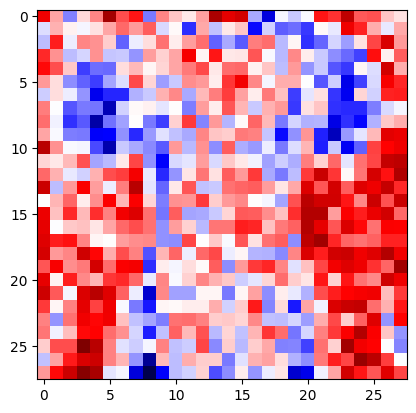

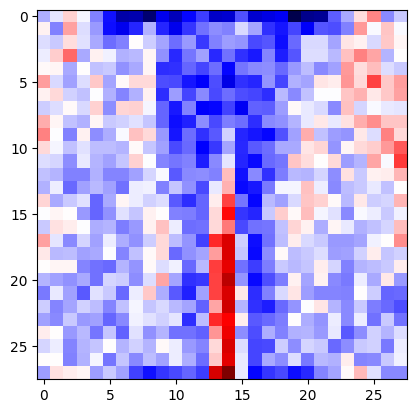

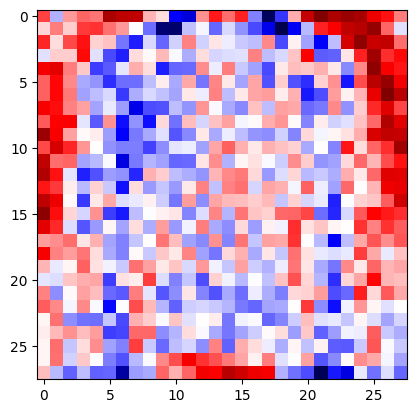

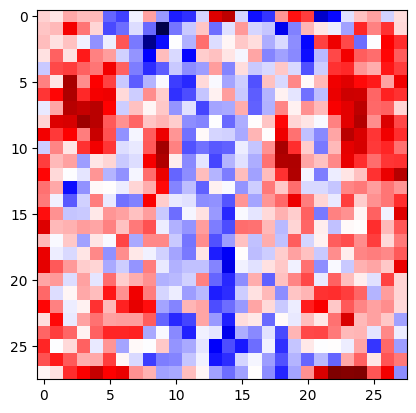

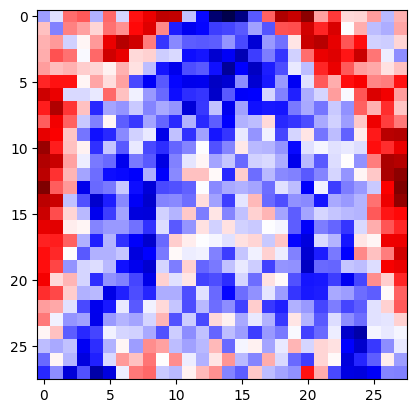

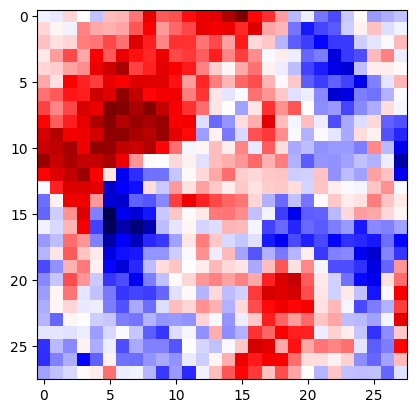

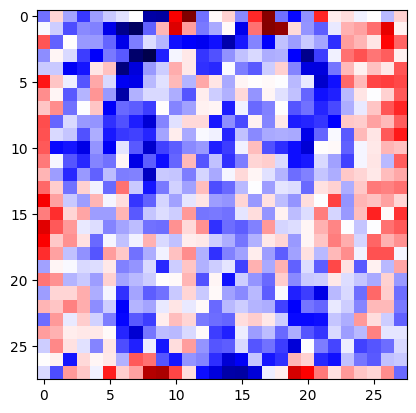

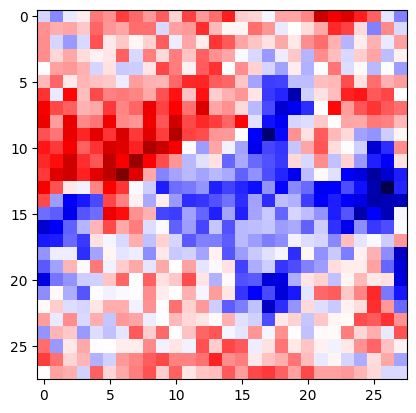

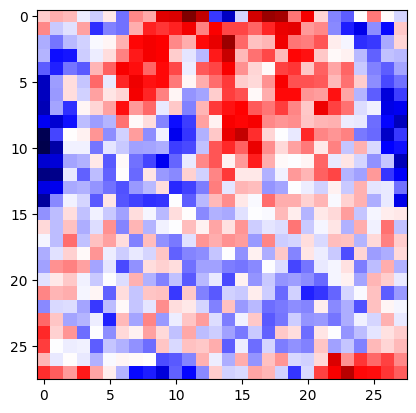

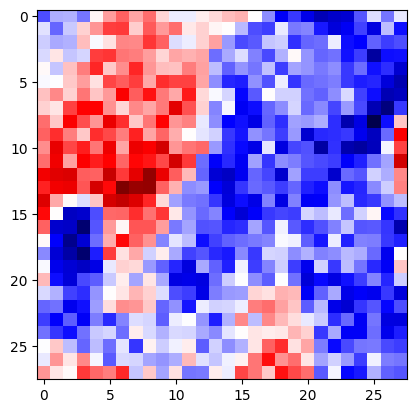

In [81]:
w = model.get_weights()
print(w)
w = np.asarray(w[0])
for i in range(10):
  plt.figure()
  plt.imshow(w[:,i].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))

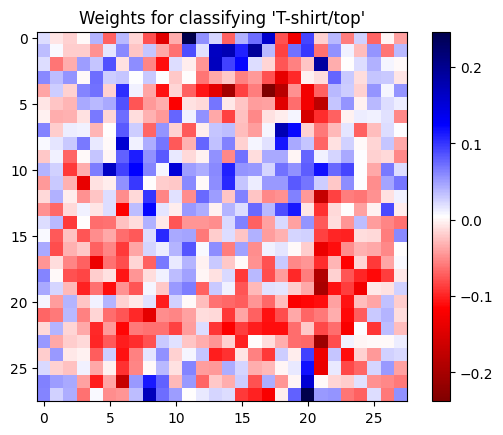

[[  5.  -2.  -5.   0.  10. -18.  10.  -4. -20. -37.  -9.  63.  15.   6. -18.  10.  19.  41. -20. -33.  24.  -5.  10. -15.   7. -17.  -0. -10.]
 [  9.   2.  -5.  -5. -12.   4.  15.  -6.   8.  -9. -16.  23.   5.  42.  45.  28.  50.  10. -22.  18.  25. -16.  14.   3.  -7.  14. -15.   9.]
 [  5. -16.  -9.  13.   8.  22.  -2.  15. -13. -28.   5.  -1. -12.  43.  24.  31.   5.  -4. -20. -14.  -6.  48.  -9.   1.   5.  11.   2.   0.]
 [ 15.   9.  14.   0.  19.   7.   8.   1.   8.   1.  -5.   1. -16.  -9.  -5. -14. -11. -20. -36. -25.  -1.  -3.  20.   8.  -3.   8.   8.  -2.]
 [-10.   7.  -4.  16.  18.  -4.  27.   3. -10. -27.  -4. -18. -27. -36. -52. -22. -15. -61. -46. -12. -32. -18.  10.   7.  -4.  14.   2.  14.]
 [ -2.  -6.  -8.  11.  10.  11.  22. -20. -11.  -9. -30.  -3.  -4.  18.  -2.  -6. -11. -10. -37. -17. -33. -46.   8.  14.  -1.  10.   5.   3.]
 [ -1.  -9.  -8.  -3.  17.  -4.  19.  -3.  -8. -11.  20.   3.  14.  -9. -22.  -7. -13.  -3.  -1.   2. -40. -24. -18.  -1.   3.   3.   5. -13.]

In [82]:
first_layer_weights = network.layers[0].get_weights()[0] # Get weights from the first layer
# Let's visualize the weights for the first output unit of the first layer
# (which corresponds to the first class, 'T-shirt/top' in Fashion MNIST)
# These weights represent what the network 'looks for' to identify this class.
np.set_printoptions(precision=0, suppress=True, linewidth=220)
# Scale back to 0-255 for better visual interpretation if desired, but 0-1 is fine for visualization.
plt.figure()
plt.imshow(first_layer_weights[:,0].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))
plt.title("Weights for classifying 'T-shirt/top'")
plt.colorbar()
plt.show()
print(np.matrix(255 * (first_layer_weights[:,0].reshape([28,28]))))

---

# RETOMAMOS EL MODELO ORIGINAL PARA PINTAR LOS PESOS APRENDIDOS

In [86]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
network.summary()
print("=======================================================================")
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
from tensorflow.keras.utils import to_categorical # Corrected import
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
network.fit(train_images, train_labels, epochs=5, batch_size=128)
print("=======================================================================")
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
print("=======================================================================")
Y_pred = network.predict(test_images)
print('Predicción para la primera imagen de test:', Y_pred[0])
print("=======================================================================")
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print("Valor real para la primera imagen de test:", Y_pred_classes[0])

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
3.10.0
GPU Available: []
2.20.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Entrada_Relu (Dense)       │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida_Softmax (Dense)     │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8698 - loss: 0.4430
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9666 - loss: 0.1147
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0742
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9841 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9893 - loss: 0.0361
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9765 - loss: 0.0821
test_loss: 0.06927342712879181
test_acc: 0.9796000123023987
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
Predicción para la primera imagen de test: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Valor real para la primera imagen de test: 7


In [87]:
import numpy as np
import matplotlib.pyplot as plt
w = network.get_weights()
# Capa 0 => Pesos
first_layer_weights = network.layers[0].get_weights()[0]
print('Forma de los Pesos de la capa 0: ',first_layer_weights.shape)
# Capa 0 => Umbrales
first_layer_biases  = network.layers[0].get_weights()[1]
print('Forma de los Umbrales de la capa 0: ',first_layer_biases.shape)
# Capa 1 => Pesos
second_layer_weights = network.layers[1].get_weights()[0]
print('Forma de los Pesos de la capa 1: ',second_layer_weights.shape)
# Capa 1 => Umbrales
second_layer_biases  = network.layers[1].get_weights()[1]
print('Forma de los Umbrales de la capa 1: ',second_layer_biases.shape)

Forma de los Pesos de la capa 0:  (784, 512)
Forma de los Umbrales de la capa 0:  (512,)
Forma de los Pesos de la capa 1:  (512, 10)
Forma de los Umbrales de la capa 1:  (10,)


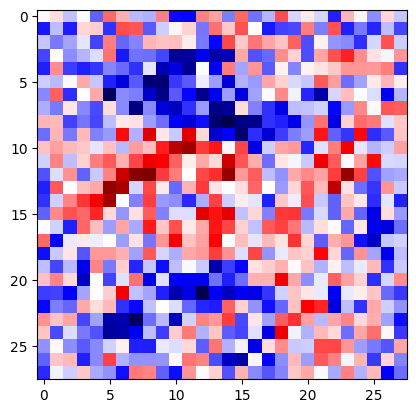

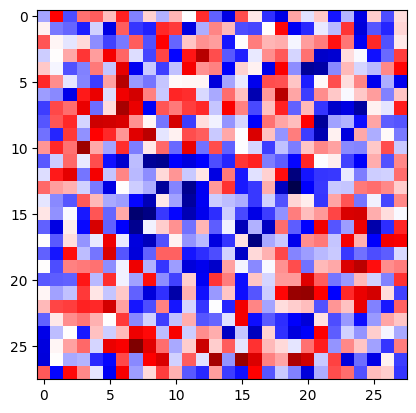

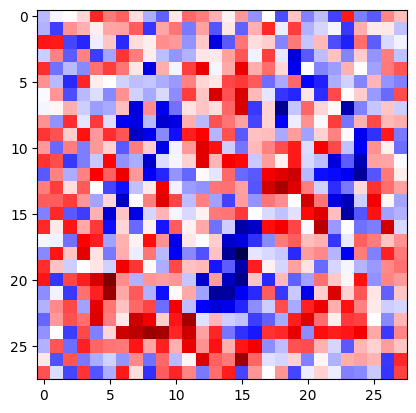

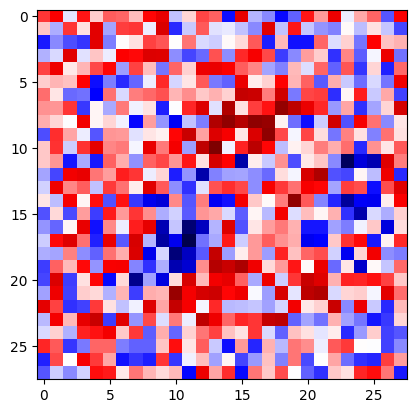

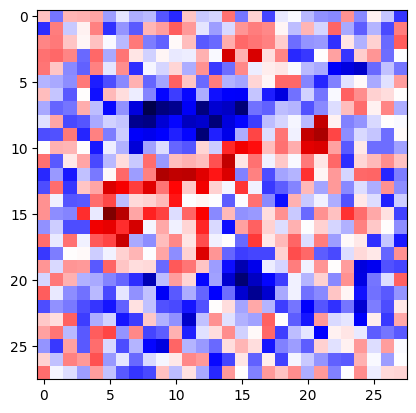

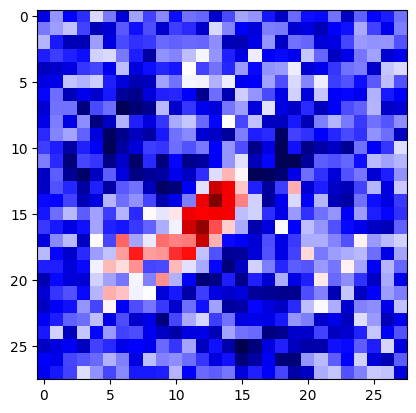

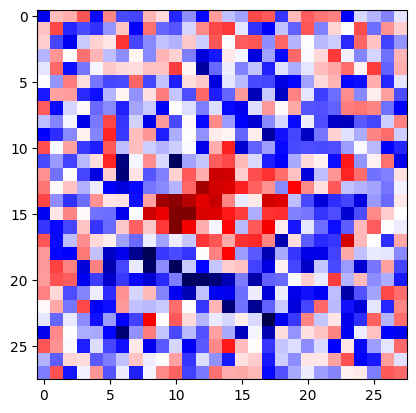

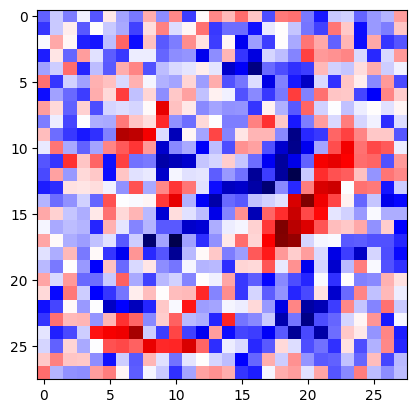

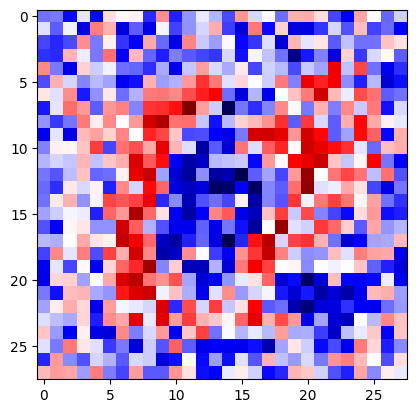

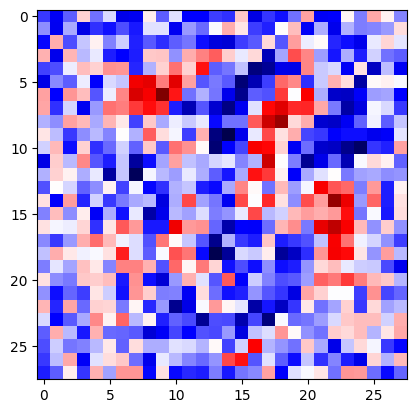

In [88]:
w = np.asarray(first_layer_weights)
for i in range(10):
  plt.figure()
  plt.imshow(w[:,i].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))